In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import re
from matplotlib import pyplot as plt
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsRestClassifier


In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
print(train.shape)
print(test.shape)

(157571, 2)
(2000, 1)


In [4]:
train.head()

,comment_text,toxic
0,Barcelona football seasons (early 20th century...,0
1,"""\n\n answering questions \n\nI won't have a c...",0
2,"""\n\nIssues\nOnefortyone, the reason why I rem...",0
3,"""\nIn that case would """"new age"""" at least be ...",0
4,"Mr. Wolf,\nWe need to have a serious talk abou...",0


In [5]:
train.isna().sum()

comment_text    0
toxic           0
dtype: int64

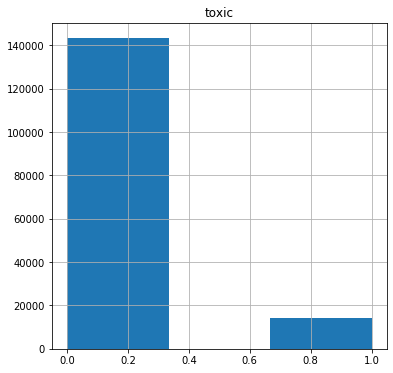

In [6]:
train.hist(figsize=(6, 6), bins=3)
plt.show()

In [7]:
pd.set_option("display.max_colwidth", 999)
train[(train["toxic"]==1)]

,comment_text,toxic
8347,"Hey Rama!! \n\nHey Rama, Raima, or whatever your name is, keep your nose out of my business and tend to your own affairs. If I want to post a message on users David-A or Gaashooru's talk pages, that my business, stay out of it!!!!",1
8351,"Hey James ? I DID provide those exact same URL's in the first place politely. Your asslicking self-important buddy editor turned it into a pissing contest, not me. If either he or you could actually read, this would never have got to this point. \n\n But since you are illiterate, I have a suggestion for you - turn your worthless fucking loser block into thirty years. \n\n And jam your useless fucking loser wikipedia up your ass, while you're at it, fool.\n\n Bye",1
8360,"Wehwalt, what the fuck is this? Your own personal little fiefdom? What you're doing here is astonishingly wrong and you know it. I get that you don't like Shapiro, but you know perfectly well that alleged reprints by militant Internet activists from unknown and defunct print sources are worthless. Oh hey, and it looks like I already crossed paths with you here months ago, but you didn't give up. This is garbage and you know it.",1
8363,.\n\nfuck you. learn how to type a url correctly you jerkoff,1
8368,"Dare send messages like this. You are the cause of Vandalism not me,...&*%$4@###banged up head",1
...,...,...
157494,"""\n\n our previous conversation \n\nyou fucking shit eating liberal, you make lady bird johnson shake on her tampon. I said fucking sorry for my little brother and you still had to fucking complain. My life is fucking shit. My mother is always yelling at me and my dad beats the shit out of me if I get fucking out of line. My brother's one outlet is wikipedia. He cried when he saw my father smacking me, and his tears clogged his mac book pro's keyboard. we had to go to fucking apple and get a new one, all out of my mom's pocket. then last night i wanted to take this hot pussy from connecticut out in my dad's new rolls-royce and he said fucking no. so you know what I fucking did? I fucking cut his pinky off and didnt snitch like a little bitch like you. I take lazy ass niggers like you and stomp you with my fat nazi heel. you should be FUCKING sorry you ever fucked with me or my dad (Steve Jobs). And if I find out your using Linux, I'll take pity on thee. Cause you're just too stupi...",1
157514,YOU ARE A MISCHIEVIOUS PUBIC HAIR,1
157541,Your absurd edits \n\nYour absurd edits on great white shark was total vandalism and was very sexual. All you edit here is fucking bullshit like spam all over this useful encyclopedia so stop all your bullshit. The admins have you everywhere. The only choice for you is to stop this bullshit or else you'll be blocked permanently. User:Factual80man,1
157546,"""\n\nHey listen don't you ever!!!! Delete my edits ever again I'm annoyed because the WWE 2K15 a few of the roster have been confirmed and your stupid ass deletes what I write. just stop!!!! Please STOP!!!! You don't work 2k or WWE games so stop deleting other peoples shit if I get it wrong or others get it wrong let them they will get the hang of it eventually but don't stick your most ass in their and I'm gonna delete the """"please do not insert the roster"""" shit how do you not have it if has been confirmed!!!!! God your stupid.""",1


In [8]:
train[(train["toxic"]==0)]

,comment_text,toxic
0,"Barcelona football seasons (early 20th century) \n\nI looked at the Barcelona football seasons for which you added (and some other seasons after). They could do with , really. (I don't think it's worth listing at WP:PNT, but this should put them in view of one way or another, or if not that could be added to their talk pages). I don't want to do it myself (a) because I am lazy and (b) because I know nothing about football and would probably make translation mistakes.",0
1,"""\n\n answering questions \n\nI won't have a chance to say hello or goodbye when I'm blocked/banned/whatever. So, """"Hello; I'm not holding my breath on anyone addressing your questions concerning Dawn Well's page on Wiki; and I better get in a good-bye, as I feel I have the lifespan of a May fly in a low ceilinged room full of bullfrogs; not because I’m wrong, but because anyone on your side of the issue is going to be attacked and baited into some infraction, an infraction ignored by someone they like, but an infraction that will be worthy of execution when committed by me.”""",0
2,"""\n\nIssues\nOnefortyone, the reason why I removed your edits, because they have following problems:-\n\nIt is Graceland that is 2nd most visited place in the USA., , , Not Biltmore Estate.\n""""The décor throughout the house has often been criticized"""" is incorrect, it has not been criticized by anyone. Then you put up the quotes of Albert Goldman, a fringe theorist on Elvis Presley, and added them under Graceland#Basement, which is irrelevant.\nThose """"conflicting reports"""" about his death have no relevance on this article, especially when they are disputed or rejected enough times.\n This is why this kind of content misleads and should be removed. I don't see any consensus for adding it on archives or previous discussion either. """,0
3,"""\nIn that case would """"new age"""" at least be acceptable? _friend """,0
4,"Mr. Wolf,\nWe need to have a serious talk about Asthma. Have you done any reading about ASTHMA? The Beta Adrenergic Theory is the ONLY Theory of Asthma that can be associated with one name {not including crackpots} so your question about other names insults my intelligence!!!!!!!!!!!!!!!!!!!! Not only that but in contrast to other theories this one has been cited more than any other article in the history of the Journal of Allergy according to the GARFIELED LIBRARY at The University of Pennsylvania. \nLast but not least, my comment would be out of place in the history section because it relates DIRECTLY to the BA2 polymorphism. Since other polymorphisms CANNOT be related to a specific theory, much less to a specific individual, your comment doesn't make any sense.",0
...,...,...
157566,""":::::And for the second time of asking, when your view completely contradicts the coverage in reliable sources, why should anyone care what you feel? You can't even give a consistent argument - is the opening only supposed to mention significant aspects, or the """"most significant"""" ones? \n\n""",0
157567,You should be ashamed of yourself \n\nThat is a horrible thing you put on my talk page. 128.61.19.93,0
157568,"Spitzer \n\nUmm, theres no actual article for prostitution ring. - Crunch Captain.",0
157569,And it looks like it was actually you who put on the speedy to have the first version deleted now that I look at it.,0


In [9]:
y = train['toxic']

In [10]:
features_trn = pd.DataFrame()
features_tst = pd.DataFrame()

features_trn['length_of_text'] = train['comment_text'].apply(len)
features_tst['length_of_text'] = test['comment_text'].apply(len)


print ("Mean number of letter non-toxic comments: ", (features_trn[train['toxic']==0]['length_of_text']).mean()) 
print ("Mean number of letter toxic comments: ", (features_trn[train['toxic']==1]['length_of_text']).mean())


Mean number of letter non-toxic comments:  404.4461986222492
Mean number of letter toxic comments:  293.0163005456835


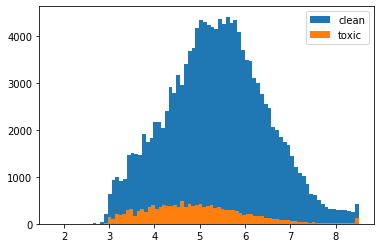

In [11]:
plt.hist(np.log(features_trn[train['toxic']==0]['length_of_text']), bins=80, label='clean')
plt.hist(np.log(features_trn[train['toxic']==1]['length_of_text']), bins=80, label='toxic')
plt.legend()
plt.show()

In [12]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [13]:
punctuation_trn = [len(re.findall('[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]', comment)) for comment in train['comment_text']]
features_trn['punctuation'] = punctuation_trn

punctuation_tst = [len(re.findall('[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]', comment)) for comment in test['comment_text']]
features_tst['punctuation'] = punctuation_tst

In [14]:
print ("Mean number of punctuation in non-toxic comments: ", (features_trn[train['toxic']==0]['punctuation']).mean()) 
print ("Mean number of punctuation in toxic comments: ", (features_trn[train['toxic']==1]['punctuation']).mean())

Mean number of punctuation in non-toxic comments:  16.03823363135744
Mean number of punctuation in toxic comments:  14.367566811249475


In [15]:
caps_lock_trn = [len(re.findall('[A-Z]', comment)) for comment in train['comment_text']]
caps_lock_tst = [len(re.findall('[A-Z]', comment)) for comment in test['comment_text']]
features_trn['caps_lock'] = caps_lock_trn
features_tst['caps_lock'] = caps_lock_tst

Не забыть написать почему логарифмировал и что за всплеск в конце


In [16]:
stop = stopwords.words('english')
wnl = WordNetLemmatizer()
def low_case(word_array):
    word_array = word_array.str.lower()
    return word_array
def stopwords(word_array):
    word_array = word_array.apply(lambda x: " ".join(x for x in str(x).split() if x not in stop))
    return word_array
def punctuation(word_array):
    word_array = word_array.str.replace('[^\w\s]' ,'')
    word_array = word_array.str.replace('\n','')
    word_array = word_array.str.replace('  ' ,' ')
    return word_array
def numbers(word_array):
    word_array = word_array.apply(lambda x : re.sub(r'\d+', '', x))
    return word_array
def tokenize(word_array):
    word_array = word_array.apply(word_tokenize)
    return word_array
def lemm_words(word_array):
    word_array = word_array.apply(lambda x: " ".join([wnl.lemmatize(word) for word in x.split()]))
    return word_array

In [17]:
def clean_pipeline(word_array):
    word_array = low_case(word_array)
    word_array = stopwords(word_array)
    word_array = punctuation(word_array)
    word_array = lemm_words(word_array)
    word_array = numbers(word_array)
    word_array = tokenize(word_array)
    return word_array

In [18]:
train = clean_pipeline(train['comment_text'])
test = clean_pipeline(test['comment_text'])

In [19]:
from urllib import request
url_google = 'https://raw.githubusercontent.com/RobertJGabriel/Google-profanity-words/master/list.txt'
txt_google = request.urlopen(url_google).readlines()
url_areebbeigh = 'https://raw.githubusercontent.com/areebbeigh/profanityfilter/master/profanityfilter/data/badwords.txt'
txt_areebbeigh = request.urlopen(url_areebbeigh).readlines()

In [20]:
google_profanity = [line.decode("utf-8").replace('\n','') for line in txt_google]
areebbeigh_profanity = [line.decode("utf-8").replace('\n','').lower() for line in txt_areebbeigh]
profanities = list(set(google_profanity + areebbeigh_profanity))

In [21]:
profanity_train = []
profanity_test = []
for comment in train:
    profanity_train.append(len([x for x in comment if x in profanities]))
for comment in test:
    profanity_test.append(len([x for x in comment if x in profanities]))

In [22]:
features_trn['profanity_count'] = profanity_train
features_tst['profanity_count'] = profanity_test

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [24]:
def identity_tokenizer(text):
    return text

tfidf = TfidfVectorizer(tokenizer=identity_tokenizer, stop_words='english', lowercase=False)    
X = tfidf.fit_transform(train)

/anaconda3/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['b', 'c', 'd', 'e', 'f', 'g', 'h', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [25]:
test = tfidf.transform(test)

In [26]:
from scipy.sparse import hstack
X = hstack((X, features_trn))
test = hstack((test, features_tst))

In [27]:
'''from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)'''

'from sklearn.model_selection import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)'

In [28]:
'''from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train, y_train) '''

'from sklearn.metrics import accuracy_score\nfrom sklearn.svm import SVC\nclf = SVC()\nclf.fit(X_train, y_train) '

In [29]:
'''accuracy_score(clf.predict(X_test), y_test)'''

'accuracy_score(clf.predict(X_test), y_test)'

SVMs work fine on sparse and unbalanced data. Class-weighted SVM is designed to deal with unbalanced data by assigning higher misclassification penalties to training instances of the minority class.

0.9113059866535895


In [30]:
from sklearn.model_selection import TimeSeriesSplit,KFold
n_fold = 5
folds = KFold(n_splits=n_fold,shuffle=True)

print(folds)


KFold(n_splits=5, random_state=None, shuffle=True)


In [31]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import accuracy_score


feature_importances = []
for fold_n, (train_index, valid_index) in enumerate(folds.split(X)):
    lgbclf = lgb.LGBMClassifier(
        num_leaves= 512,
        n_estimators=512,
        max_depth=-1,
        learning_rate=0.065,
        subsample=0.85,
        colsample_bytree=0.85,
        boosting_type= "gbdt",
        reg_alpha=0.3,
        reg_lamdba=0.243
)
    X_train_, X_valid, y_train_, y_valid = train_test_split(X, y, test_size=0.33, random_state=fold_n)
    lgbclf.fit(X_train_,y_train_)
    pred=lgbclf.predict(test)


    print('accuracy: {}'.format(accuracy_score(lgbclf.predict(X_valid), y_valid)))

    del lgbclf, X_valid
    del y_valid



/anaconda3/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)
/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py:478: UserWarning: Converting data to scipy sparse matrix.
  warnings.warn('Converting data to scipy sparse matrix.')


accuracy: 0.9594992211388681
accuracy: 0.9595761456951095
accuracy: 0.960595396065309
accuracy: 0.9591338294967211
accuracy: 0.9597107636685321


accuracy: 0.9594992211388681
accuracy: 0.9595761456951095
accuracy: 0.960595396065309
accuracy: 0.9591338294967211
accuracy: 0.9597107636685321

In [36]:
lgb_submission= pd.read_csv('test.csv')
lgb_submission['toxic'] = 0
lgb_submission['toxic'] = lgb_submission['toxic']+pred
lgb_submission.to_csv('prediction.csv')
lgb_submission.head()

,comment_text,toxic
0,"You can't fucking block me for 3 months for fucking personal attacks or harassment! You fucking stupid hellhole, you better motherfucking let me vandalize Wikipedia again FRICKEN NOW!",1
1,I insulted people on en.wiki with criteria to provoke my filter set. You are simply abusing the power people handed over.,0
2,"My side of the story\n\nAttention, douchebags and douchetees. I have been labled as a Terrorist on this site. BULL TO THE SHIT! I simply have a vast amount of knowlege on a wide range of topics. Scjessey, for example did not mention he is a fucking douchebag on his article. So I had to ammend this. I was simply trying to spread the truth. ALLLALLALALALALALAlAlALAALALAALALALALALAl. Sorry. I have to do that every 5 minutes or I go to hell. ALLALALALALALALALALALALALALALALLALALALALALLLALALALA ALLAH 4EVER!",1
3,"Looks good to me. I think a nice pic of Midtown from across the East River would be the best possible addition to the montage, but there isn't one currently available on wiki commons.",0
4,"RE: \n\nPunk ass snitch, get the cock.",1
